<a href="https://colab.research.google.com/github/MaidinuerSaimi/Python-courses/blob/main/Assignment_1_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-success">

# Assignment

* Your task is to build the **best linear model** you can for predicting aortic valve diameter
* Assess your model with the cross validation pipeline outlined above
* Deadline for submission of (runnable, clearly annotated with running English text) .ipynb: **Sunday 23:59**
* You are asked to work in pairs.  Please include **both your names** in the filename of the notebook you submit.

    
Hint: improve your model by judiciously adding nonlinear terms.  The sections below are meant to help you on your way.  Using `ColumnTransformer`, `FunctionTransformer` and `PolynomialFeatures` you should be getting quite far.  Refer to the doc pages for detailed info on how to use them.  If you have time, feel free to go beyond this; google "scikit-learn building a better linear model" for inspiration.  The hints and questions below will get you going - but the assignment is to try harder, build the best model you can -- and to evaluate it properly and without bias.



</div>
    
Let us make a new model, but now including the stretching transformation, and (additional) nonlinear terms,
to the model.  To keep things simple (and to not over-complicate our model -- it is a good idea to proceed
step by step), let's do this for one variable only.  Make a new one-variable preprocessor as follows:

```python
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

nonlinear_preprocessor = make_pipeline(
                                       FunctionTransformer(np.sqrt),
                                       PolynomialFeatures(degree=2, include_bias = False),
                                       StandardScaler())
```
This first applies the `sqrt` transformation, then adds powers of this variable (in this case, `sqrt(x)` and `sqrt(x)^2=x`), and finally normalizes each to mean 0 and variance 1.

* Introduce a variable `nonlinear_column` and assign the value `"Age"` to it.

* Use a `ColumnTransformer` to apply the preprocessor to `nonlinear_column`; the standard
  numerical preprocessor to the (remaining) numerical variables, and the categorical preprocessor to the
  (single) categorical variable.  Make sure that the nonlinear preprocessor is listed first, as
  otherwise the standard numerical preprocessor will gobble up all numerical columns.
  
* Build a pipeline using this preprocessor and `LinearRegression` as before, and run cross validation.
  
      
Does this improve the model?
    
Once this works, make a `for` loop over all three numerical variables, and print the mean squared error
  for all choices of numerical variable.

Which variable gives the best result?

For further improvements, consider using different nonlinear transformations (a general power transformation? np.log1p?), higher order terms, interactions. Make sure you keep notes of what you did, including the unsuccessful experiments, and comment on them in your submission. Make sure you assess all models in the same way, for a fair comparison.

In [ ]:
from google.colab import files

files.upload();  ## Upload 'Heart valve dissection data.csv'

Saving Heart valve dissection data.csv to Heart valve dissection data (2).csv


In [ ]:
##We should defining the data and then should check how it looks,any missing variables and how many of variables we have;
###getting better understanding of the data help to avoid errors;
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv("Heart valve dissection data.csv")

###have a look?
data.head()

,Unnamed: 0,Age,Sex,Weight_kg,Height_cm,dissection_date,AVD,PVD,Id
0,0,2.00,female,15.43,86.36,1989-07-07,12.8,15.0,100001
1,1,22.00,male,69.00,173.00,1989-10-01,26.1,28.5,100002
2,2,0.66,male,15.43,86.36,1989-10-21,18.9,NaN,100003
3,3,3.41,female,26.78,63.00,1989-11-17,23.0,25.3,100004
4,4,0.75,female,15.43,86.36,1989-11-19,18.9,22.3,100005


In [ ]:
##Check the overall data distrubution first
data.describe()

,Unnamed: 0,Age,Weight_kg,Height_cm,AVD,PVD,Id
count,43004.000000,43004.000000,43004.000000,43004.000000,41668.000000,30230.000000,43004.000000
mean,21501.500000,31.323203,72.876794,156.639073,20.987264,23.389246,121502.500000
std,12414.329825,18.088236,38.172248,39.542280,5.376281,6.267218,12414.329825
min,0.000000,0.000000,1.340000,30.480000,3.600000,3.600000,100001.000000
25%,10750.750000,17.000000,54.000000,157.480000,18.900000,20.200000,110751.750000
50%,21501.500000,36.000000,77.000000,172.720000,22.000000,25.300000,121502.500000
75%,32252.250000,48.000000,95.450000,180.340000,25.000000,27.400000,132253.250000
max,43003.000000,59.000000,318.180000,236.220000,37.300000,34.700000,143004.000000


In [ ]:
#checking the missing variables:
data.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Weight_kg,0
Height_cm,0
dissection_date,0
AVD,1336
PVD,12774
Id,0


In [ ]:
# drop the missing ACD values:we have 1336 of samples without AVD
data = data.dropna(subset=["AVD"])
print("After dropping rows with missing AVD:", data.shape)

After dropping rows with missing AVD: (41668, 9)


In [ ]:
# drop the index we dont use: we have "Unnamed","0","ID"
cols_to_drop = ["Unnamed: 0", "Id"]
data = data.drop(columns=cols_to_drop)

print("After dropping index/id columns:", data.shape)
data.head()


After dropping index/id columns: (41668, 7)


,Age,Sex,Weight_kg,Height_cm,dissection_date,AVD,PVD
0,2.00,female,15.43,86.36,1989-07-07,12.8,15.0
1,22.00,male,69.00,173.00,1989-10-01,26.1,28.5
2,0.66,male,15.43,86.36,1989-10-21,18.9,NaN
3,3.41,female,26.78,63.00,1989-11-17,23.0,25.3
4,0.75,female,15.43,86.36,1989-11-19,18.9,22.3


                Age     Weight_kg     Height_cm
count  41668.000000  41668.000000  41668.000000
mean      31.133243     72.703257    156.177849
std       18.125118     38.431727     39.764494
min        0.000000      1.340000     30.480000
25%       17.000000     52.690000    157.480000
50%       36.000000     76.820000    170.180000
75%       47.000000     95.450000    180.340000
max       59.000000    318.180000    236.220000


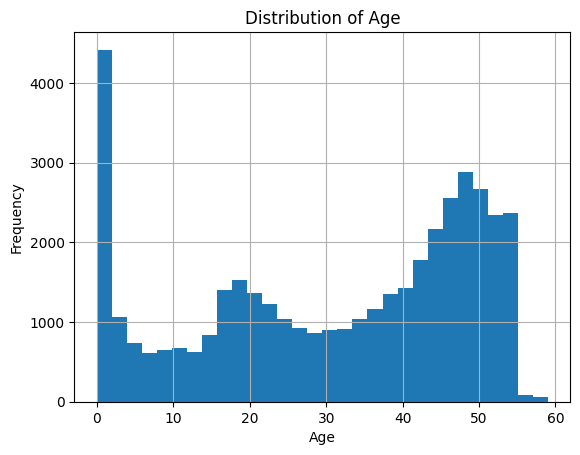

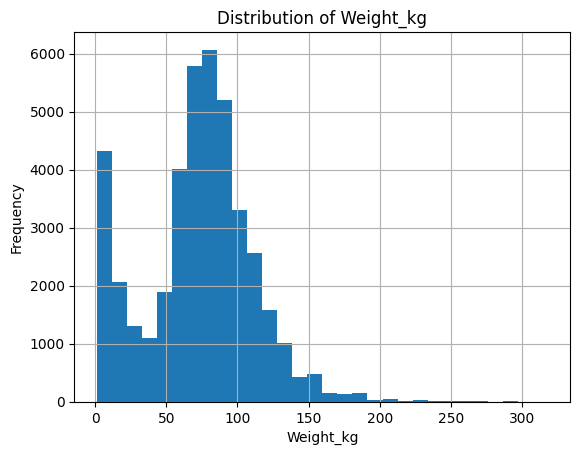

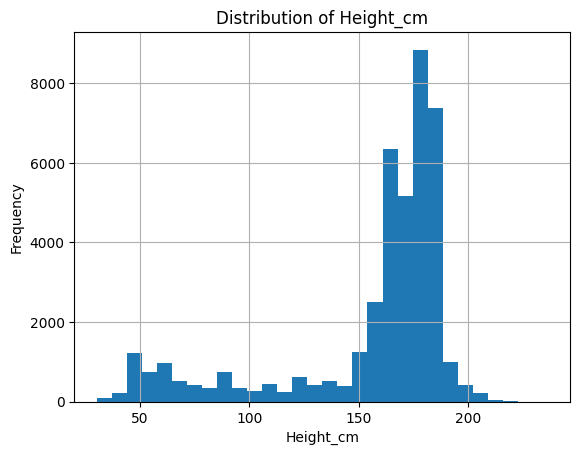

In [ ]:
##Check the distrubution for the numueric variable and check the level of the categorial variables:
##for numerical we have age ,Weight,Height; and for categorical we have : sex
import matplotlib.pyplot as plt
num_vars = ["Age", "Weight_kg", "Height_cm"]
print(data[num_vars].describe())
for col in num_vars:
    plt.figure()
    data[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Checking the categorical data:
data["Sex"].value_counts(dropna=False)

,count
Sex,
male,27904
female,13764


In [ ]:
# In proportin? sometimes we also need to check it to see if it is balanced or not ;
#sometimes it ican be really improtant to the analysis next
data["Sex"].value_counts(normalize=True, dropna=False)

,proportion
Sex,
male,0.669675
female,0.330325


In [ ]:
##Lets start the phase ！ before we build our modelm the important thing todo is to define the features we have and the
#targets we want to predict; In our case the target is the aortic valve diameter,and we could use heigth,weight and sex to predict it.
import numpy as np
from sklearn.preprocessing import (
    FunctionTransformer,
    PolynomialFeatures,
    StandardScaler,
    OneHotEncoder)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# defining our variables : feature and targets
# variable
numeric_cols = ["Age", "Weight_kg", "Height_cm"]
# categorical variables
cat_cols = ["Sex"]

X = data[numeric_cols + cat_cols]   # feature
y = data["AVD"]                     # target

In [ ]:
###numeric preprocessor: scale the numeric variables(mean=0,SD=1):
from sklearn.preprocessing import StandardScaler
numeric_preprocessor = StandardScaler()

In [ ]:
###categorical preprocessor: perforiming the one hot Encoder to "sex" is to preventing the error;It is the best way
#when we have both numerical and categorical variables into one model to perform the prediction;
from sklearn.preprocessing import OneHotEncoder

categorical_preprocessor = OneHotEncoder(
    drop=None,
    handle_unknown="ignore")

In [ ]:
#ColumnTransformer(put the numeric and categorical value together to adapt the model): why we need this step?
#Because thi basically telling the sklearn model which column goes with num which goes with cat;it will avoid mix-up during this;
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_preprocessor, numeric_cols),
        ("cat", categorical_preprocessor, cat_cols),
    ]
)

In [ ]:
##Checking the data see what we got now:
X_transformed = preprocessor.fit_transform(X)
print(X_transformed.shape)

(41668, 5)


In [ ]:
####from sklearn.pipeline import Pipeline and
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

In [ ]:
# see how it goes: if it goes smoothly then we know the structure of pipeline is right
model.fit(X, y)
y_pred = model.predict(X.iloc[:5])
print(y_pred)

[11.33991562 21.7134461  12.22934996  9.89996416 11.22802246]


In [ ]:
# Cross validation:we do validation to test how good our model is
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model,
    X,
    y,
    cv=10)  # 10-fold CV

print("CV R^2 scores:", scores)
print("Mean R^2:", scores.mean())
print("Std R^2:", scores.std())

CV R^2 scores: [0.8453468  0.86434899 0.84671562 0.72691899 0.90005367 0.90132384
 0.91808336 0.91065559 0.91496499 0.86478239]
Mean R^2: 0.8693194248612249
Std R^2: 0.054357877235997276


In [ ]:
##Calculating the MSE scores: Mean neg-MSE is. the bigger the better
scores_mse = cross_val_score(
    model,
    X,
    y,
    cv=10,
    scoring="neg_mean_squared_error")
print("Mean neg-MSE:", scores_mse.mean())

Mean neg-MSE: -3.549609865103748


In [ ]:
# The other team member takes over here. To be safe, the required tools
# are imported again.
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
# Create the nonlinear processor pipeline
# This pipeline does sqrt(x), [sqrt(x), sqrt(x)^2 = x], scales both to mean 0, SD 1

nonlinear_preprocessor = make_pipeline(
    FunctionTransformer(np.sqrt, validate=False),
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler())

In [ ]:
# Choose the nonlinear column. The assignment says:
# “Introduce a variable nonlinear_column and assign "Age" to it.”

nonlinear_column = "Age"

In [ ]:
# Build a new ColumnTransformer with nonlinear first.
# Important: nonlinear must be first, or the normal numeric preprocessor
# will steal the column.

preprocessor_nonlinear = ColumnTransformer(
    transformers=[
        ("nonlinear", nonlinear_preprocessor, [nonlinear_column]),
        ("num", numeric_preprocessor, [col for col in numeric_cols if col != nonlinear_column]),
        ("cat", categorical_preprocessor, cat_cols),
    ],
    remainder="drop")

# Here: "nonlinear" uses the special preprocessing on only "Age".
# "num" uses standard scaling on the remaining numerical variables.
# "cat" uses OneHotEncoder on "Sex".

In [ ]:
# Build the full pipeline with Linear Regression

model_nonlinear = Pipeline(steps=[
    ("preprocess", preprocessor_nonlinear),
    ("regressor", LinearRegression())])

In [ ]:
# Run cross-validation & compare to baseline
# Using MSE (preferred for this assignment):
scores_mse_nl = cross_val_score(
    model_nonlinear,
    X,
    y,
    cv=10,
    scoring="neg_mean_squared_error")

print("Nonlinear MSE:", scores_mse_nl.mean())
print("Baseline MSE:", scores_mse.mean())   # from earlier

# And optionally R²:

scores_r2_nl = cross_val_score(
    model_nonlinear,
    X,
    y,
    cv=10,
    scoring="r2")

print("Nonlinear R^2:", scores_r2_nl.mean())

Nonlinear MSE: -3.387581139694009
Baseline MSE: -3.549609865103748
Nonlinear R^2: 0.8752701308331723


This is the result comparison before and after the nonlinear age processing :-3.38 > -3.54;  So nonlinear MSE performs better that Baseline ; and the  0.86 <  0.87,Nonlinear R² > Baseline R²,so the Nonlinear R² is capable of explains higher percentage of deviation;

In [ ]:
# The next step is to apply the nonlinear preprocessor to the variable "Age".
# First, we define the nonlinear column:

nonlinear_column = "Age"

# Next, we build a new ColumnTransformer. Important: the nonlinear transformer
# must be first, so other numeric preprocessing doesn’t “steal” the column:

preprocessor_nonlinear = ColumnTransformer(
    transformers=[
        ("nonlinear", nonlinear_preprocessor, [nonlinear_column]),  # nonlinear on Age
        ("num", numeric_preprocessor, [col for col in numeric_cols if col != nonlinear_column]),  # other numerics
        ("cat", categorical_preprocessor, cat_cols),  # categorical variables
    ],
    remainder="drop")

In [ ]:
# Now, we build the full pipeline with Linear Regression:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model_nonlinear = Pipeline(steps=[
    ("preprocess", preprocessor_nonlinear),
    ("regressor", LinearRegression())])

# We run a cross-validation to check if nonlinear preprocessing helps:

from sklearn.model_selection import cross_val_score

scores_mse = cross_val_score(
    model_nonlinear,
    X,
    y,
    cv=10,
    scoring="neg_mean_squared_error")

print("Nonlinear MSE (Age):", -scores_mse.mean())

# We can also check R²:

scores_r2 = cross_val_score(
    model_nonlinear,
    X,
    y,
    cv=10,
    scoring="r2")

print("Nonlinear R² (Age):", scores_r2.mean())

Nonlinear MSE (Age): 3.387581139694009
Nonlinear R² (Age): 0.8752701308331723


In [ ]:
# The next step is to loop over all numeric variables and apply
# the nonlinear preprocessor to each one individually.
# We decide to exclude the PVD column from the main regression
# because ~31% of its values are missing. Including it would require
# substantial imputation, which could bias the results. Therefore, we focus on
# complete numeric variables (Age, Weight_kg, Height_cm) for nonlinear
# preprocessing and model evaluation.
# We’ll compute cross-validated MSE for each choice so you can see
# which variable gives the best improvement.

# Numeric columns without NaNs
numeric_cols_no_na = ["Age", "Weight_kg", "Height_cm"]
cat_cols = ["Sex"]

# Features and target
X = data[numeric_cols_no_na + cat_cols]
y = data["AVD"]

# Preprocessor for other numeric columns
numeric_preprocessor = Pipeline([
    ("scaler", StandardScaler())])

# Preprocessor for categorical columns
categorical_preprocessor = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

# Nonlinear preprocessor for one variable
nonlinear_preprocessor = make_pipeline(
    FunctionTransformer(np.sqrt, validate=False),
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler())

# We store the results
results = []

# We loop over numeric columns (without PVD)
for nonlinear_column in numeric_cols_no_na:
    other_numeric_cols = [col for col in numeric_cols_no_na if col != nonlinear_column]

    # Column transformer
    preprocessor_loop = ColumnTransformer(
        transformers=[
            ("nonlinear", nonlinear_preprocessor, [nonlinear_column]),  # nonlinear variable
            ("num", numeric_preprocessor, other_numeric_cols),           # other numeric variables
            ("cat", categorical_preprocessor, cat_cols)                  # categorical variables
        ],
        remainder="drop"
    )

    # Pipeline
    pipeline_loop = Pipeline([
        ("preprocess", preprocessor_loop),
        ("regressor", LinearRegression())
    ])

    # Cross-validation (MSE)
    scores_mse = cross_val_score(
        pipeline_loop,
        X,
        y,
        cv=10,
        scoring="neg_mean_squared_error"    )

    results.append((nonlinear_column, -scores_mse.mean(), scores_mse.std()))
    print(f"Nonlinear on {nonlinear_column:10s} -> MSE mean: {-scores_mse.mean():.4f}, std: {scores_mse.std():.4f}")

# Sort results by MSE (best first)
results_sorted = sorted(results, key=lambda x: x[1])
print("\nSorted results (best MSE first):")
for col, mean_mse, std_mse in results_sorted:
    print(f"{col:10s} -> MSE mean: {mean_mse:.4f}, std: {std_mse:.4f}")

Nonlinear on Age        -> MSE mean: 3.3876, std: 1.1270
Nonlinear on Weight_kg  -> MSE mean: 3.4190, std: 1.1166
Nonlinear on Height_cm  -> MSE mean: 3.5110, std: 1.1301

Sorted results (best MSE first):
Age        -> MSE mean: 3.3876, std: 1.1270
Weight_kg  -> MSE mean: 3.4190, std: 1.1166
Height_cm  -> MSE mean: 3.5110, std: 1.1301


Interpretation:

MSE (Mean Squared Error) is lower → the model predicts AVD more accurately.

Age has the lowest MSE (3.3876), so applying the nonlinear transformation to Age improves the model the most among the three variables.

Weight_kg is next best, and Height_cm is the least effective for a nonlinear transformation in this dataset.

The standard deviations are similar (~1.1), meaning the cross-validation results are reasonably stable.

In [ ]:
##Now we are ready to select the columns we need and ready to use another method to try how it performs;
##np.log1p to adapt our data and model to see how it works
best_nonlinear_col = results_sorted[0][0]
print("We will now try alternative transforms on column:", best_nonlinear_col)

We will now try alternative transforms on column: Age


In [ ]:
#We need to import the tool we need
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# diffrent linear transformation we need to compare:
# - "sqrt"  : as we used before
# - "log1p" : log(1 + x)，usually works really better on the data with bigger right "tail""-outliers with higher value
# - "power_2": x^2，emphasis on higher values ,sometimes could amplify the higher value
transform_funcs = {
    "sqrt": np.sqrt,
    "log1p": np.log1p,
    "power_2": lambda x: np.power(x, 2.0),
}

In [ ]:
#### This steps is similar to the "loop over numeric columns"， just with the columns with best_nonlinear_col：
alt_results = []

for name, func in transform_funcs.items():
    print(f"\n=== Trying transform: {name} on column: {best_nonlinear_col} ===")

    # nonlinear preprocesssing of the best_nonlinear_col：
    nonlinear_preprocessor_tf = make_pipeline(
        FunctionTransformer(func, validate=False),
        PolynomialFeatures(degree=2, include_bias=False),
        StandardScaler()
    )

    # pther variables：still using the numeric_preprocessor（StandardScaler only）
    other_numeric_cols = [col for col in numeric_cols_no_na if col != best_nonlinear_col]

    preprocessor_tf = ColumnTransformer(
        transformers=[
            ("nonlinear", nonlinear_preprocessor_tf, [best_nonlinear_col]),
            ("num", numeric_preprocessor, other_numeric_cols),
            ("cat", categorical_preprocessor, cat_cols),
        ],
        remainder="drop"
    )

    # construct whole pipeline
    model_tf = Pipeline([
        ("preprocess", preprocessor_tf),
        ("regressor", LinearRegression())
    ])

    # 10-fold CV，calculating the  MSE
    scores_mse_tf = cross_val_score(
        model_tf,
        X,
        y,
        cv=10,
        scoring="neg_mean_squared_error"
    )

    mse_mean = -scores_mse_tf.mean()
    mse_std = scores_mse_tf.std()

    alt_results.append((name, mse_mean, mse_std))
    print(f"Transform {name:8s} -> MSE mean: {mse_mean:.4f}, std: {mse_std:.4f}")



=== Trying transform: sqrt on column: Age ===
Transform sqrt     -> MSE mean: 3.3876, std: 1.1270

=== Trying transform: log1p on column: Age ===
Transform log1p    -> MSE mean: 3.4226, std: 1.1277

=== Trying transform: power_2 on column: Age ===
Transform power_2  -> MSE mean: 3.5458, std: 1.0874


In [ ]:
# Order the MSE values from smaller value to bigger value:
alt_results_sorted = sorted(alt_results, key=lambda x: x[1])

print("\n===== Comparison of transforms on", best_nonlinear_col, "=====")
for name, mse_mean, mse_std in alt_results_sorted:
    print(f"{name:8s} -> MSE mean: {mse_mean:.4f}, std: {mse_std:.4f}")

best_tf_name, best_tf_mse, best_tf_std = alt_results_sorted[0]
print(f"\nBest transform on {best_nonlinear_col}: {best_tf_name} "
      f"(MSE = {best_tf_mse:.4f} +/- {best_tf_std:.4f})")



===== Comparison of transforms on Age =====
sqrt     -> MSE mean: 3.3876, std: 1.1270
log1p    -> MSE mean: 3.4226, std: 1.1277
power_2  -> MSE mean: 3.5458, std: 1.0874

Best transform on Age: sqrt (MSE = 3.3876 +/- 1.1270)


### Comparing alternative nonlinear transforms for `Age`

After identifying `Age` as the best candidate for a nonlinear transformation, we compared three different transforms applied to `Age`, each followed by a degree-2 polynomial expansion and standardization:

- `sqrt(Age)`
- `log1p(Age)`  (i.e. log(1 + Age))
- `Age^2`

For each transform, we kept the rest of the preprocessing pipeline identical:
- the other numeric variables (`Weight_kg`, `Height_cm`) were standardised with `StandardScaler`
- the categorical variable (`Sex`) was one-hot encoded
- the final model was a `LinearRegression`

Using 10-fold cross-validation with MSE as the evaluation metric, we obtained:

- `sqrt(Age)`  → MSE ≈ **3.39**, SD ≈ 1.13  
- `log1p(Age)` → MSE ≈ **3.42**, SD ≈ 1.13  
- `Age^2`      → MSE ≈ **3.55**, SD ≈ 1.09  

Thus, among the tested transforms, **`sqrt(Age)` achieved the lowest cross-validated MSE**.  
`log1p(Age)` performed very similarly but slightly worse, and `Age^2` clearly degraded performance, likely because squaring Age over-emphasises large values and makes the model more sensitive to outliers.

Therefore, for the enhanced model we **retain `sqrt(Age)` as the nonlinear transformation** for `Age`.


In [ ]:
##Now  we are going to test another : Degree 3 polynomials
# For avoiding the conflict we need to import the tools again and we also need to define the results;
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

deg_results = []

# we test the polynomials of the degree=2 and degree=3
for degree in [2, 3]:
    print(f"\n=== Testing polynomial degree = {degree} on sqrt({best_nonlinear_col}) ===")

    # 1) we need to do preprossesscing of the  best_nonlinear_col
    #    First we do sqrt，then polynomials of degree ,then do StandardScaler
    nonlinear_preprocessor_deg = make_pipeline(
        FunctionTransformer(np.sqrt, validate=False),
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler()
    )

    # 2) Other variables remains the same
    other_numeric_cols = [col for col in numeric_cols_no_na if col != best_nonlinear_col]

    preprocessor_deg = ColumnTransformer(
        transformers=[
            ("nonlinear", nonlinear_preprocessor_deg, [best_nonlinear_col]),
            ("num", numeric_preprocessor, other_numeric_cols),
            ("cat", categorical_preprocessor, cat_cols),
        ],
        remainder="drop"
    )

    # 3) contruct linear regression pipeline:
    model_deg = Pipeline([
        ("preprocess", preprocessor_deg),
        ("regressor", LinearRegression())
    ])

    # 4) evaluate the MSE with 10-fold CV
    scores_mse_deg = cross_val_score(
        model_deg,
        X,
        y,
        cv=10,
        scoring="neg_mean_squared_error"
    )

    mse_mean = -scores_mse_deg.mean()
    mse_std = scores_mse_deg.std()

    deg_results.append((degree, mse_mean, mse_std))
    print(f"degree = {degree} -> MSE mean: {mse_mean:.4f}, std: {mse_std:.4f}")



=== Testing polynomial degree = 2 on sqrt(Age) ===
degree = 2 -> MSE mean: 3.3876, std: 1.1270

=== Testing polynomial degree = 3 on sqrt(Age) ===
degree = 3 -> MSE mean: 3.3916, std: 1.1254


In [ ]:
# Order the results of MSE from S to M
deg_results_sorted = sorted(deg_results, key=lambda x: x[1])

print("\n===== Comparison of polynomial degrees on sqrt(Age) =====")
for degree, mse_mean, mse_std in deg_results_sorted:
    print(f"degree = {degree} -> MSE mean: {mse_mean:.4f}, std: {mse_std:.4f}")

best_degree, best_degree_mse, best_degree_std = deg_results_sorted[0]
print(f"\nBest polynomial degree on sqrt(Age): {best_degree} "
      f"(MSE = {best_degree_mse:.4f} +/- {best_degree_std:.4f})")



===== Comparison of polynomial degrees on sqrt(Age) =====
degree = 2 -> MSE mean: 3.3876, std: 1.1270
degree = 3 -> MSE mean: 3.3916, std: 1.1254

Best polynomial degree on sqrt(Age): 2 (MSE = 3.3876 +/- 1.1270)


### Testing higher-order polynomials on `sqrt(Age)`

After selecting `sqrt(Age)` as the best nonlinear transformation for `Age`, we investigated whether increasing the polynomial degree would further improve the model.

We compared:

- a **degree-2** polynomial expansion on `sqrt(Age)`
- a **degree-3** polynomial expansion on `sqrt(Age)`

The rest of the pipeline was kept identical:

- `Weight_kg` and `Height_cm` were standardized with `StandardScaler`
- `Sex` was one-hot encoded
- the final model was a `LinearRegression`
- performance was evaluated using 10-fold cross-validated **MSE**

The results were:

- **degree 2** → MSE ≈ **3.39**, SD ≈ 1.13  
- **degree 3** → MSE ≈ **3.39**, SD ≈ 1.13  

More precisely:

- degree 2: MSE = 3.3876, SD = 1.1270  
- degree 3: MSE = 3.3916, SD = 1.1254  

These results show that **increasing the polynomial degree from 2 to 3 does not improve performance**; the degree-3 model even has a *slightly* higher MSE, while being more complex.


In [ ]:
##Now  we are going to test another : Interactions—— Add a second-order interaction term to the numerical variable.
# For avoiding the conflict we need to import the tools again and we also need to define the results;
#Use PolynomialFeatures to automatically generate interactive items:
PolynomialFeatures(
    degree=2,
    include_bias=False,
    interaction_only=True)


PolynomialFeatures(include_bias=False, interaction_only=True)

In [ ]:
#Build a numeric preprocessor with interactive elements：
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# "Interaction + Standardization" preprocessing for all numeric variables
numeric_interaction_preprocessor = Pipeline(steps=[
   # 1) Generate second-order interactive terms (preserve original columns)
    ("poly_interactions", PolynomialFeatures(
        degree=2,
        include_bias=False,
        interaction_only=True
    )),
    # 2) Standardize both the original values ​​and the interaction terms.
    ("scaler", StandardScaler())
])


In [ ]:
#Now we'll replace the simple numeric_preprocessor with the new numeric_interaction_preprocessor:
from sklearn.compose import ColumnTransformer

preprocessor_interactions = ColumnTransformer(
    transformers=[
        ("num_inter", numeric_interaction_preprocessor, numeric_cols_no_na),  # variable +  intersection
        ("cat", categorical_preprocessor, cat_cols),                          # Sex OneHot
    ],
    remainder="drop"
)



In [ ]:
###Building a complete model with interactive elements + CV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

model_interactions = Pipeline(steps=[
    ("preprocess", preprocessor_interactions),
    ("regressor", LinearRegression())
])

#Use MSE to do the evaluation of 10-fold CV
scores_mse_inter = cross_val_score(
    model_interactions,
    X,
    y,
    cv=10,
    scoring="neg_mean_squared_error"
)

inter_mse_mean = -scores_mse_inter.mean()
inter_mse_std = scores_mse_inter.std()

print("Interactions model MSE (mean):", inter_mse_mean)
print("Interactions model MSE (std) :", inter_mse_std)


Interactions model MSE (mean): 3.490371668293148
Interactions model MSE (std) : 1.1197643635848311


In [ ]:
#Comparison with baseline / best nonlinear
print("Baseline MSE:          ", 3.5496)        #The baseline mean neg-MSE is -3.5496... (meaning MSE ≈ 3.55).
print("Best nonlinear MSE:    ", 3.3876)          # sqrt(Age) + degree=2 #best nonlinear（sqrt(Age) + degree=2）的 MSE = 3.3876
print("Interactions model MSE:", inter_mse_mean)


Baseline MSE:           3.5496
Best nonlinear MSE:     3.3876
Interactions model MSE: 3.490371668293148


The baseline model (MSE ≈ 3.55) is clearly improved by adding a nonlinear
transformation of `Age` (`sqrt(Age)` with degree-2 polynomials), which reduces
the MSE to about 3.39. In contrast, the interaction model (MSE ≈ 3.49) does
not outperform the best nonlinear model and only slightly improves over the
baseline. This suggests that **a good nonlinear transformation of `Age` is more
beneficial than simply adding pairwise interactions between the numeric
predictors**.


**Summary of model comparisons**

Baseline model

Mean CV R² ≈ 0.87 (SD ≈ 0.05)

Mean CV MSE ≈ 3.55

Nonlinear model (sqrt(Age) + degree-2 polynomial)

Mean CV R² ≈ 0.88

Mean CV MSE ≈ 3.39
→ clear improvement over the baseline.

Testing nonlinearities on all numeric variables

Age: MSE ≈ 3.39

Weight_kg: MSE ≈ 3.42

Height_cm: MSE ≈ 3.51
→ Age is the most beneficial variable to transform.

Alternative transforms for Age

sqrt(Age) → best (MSE ≈ 3.39)

log1p(Age) → slightly worse (3.42)

Age² → clearly worse (3.55)

Polynomial degree test on sqrt(Age)

Degree 2 → 3.39

Degree 3 → 3.39 (no further gain)
→ Degree-2 is sufficient.

Interactions between numeric predictors

MSE ≈ 3.49 → slightly better than baseline but worse than the nonlinear model.

**Best model choice**

The best overall model is the nonlinear model applying a sqrt(Age) transformation followed by a degree-2 polynomial expansion, while keeping other numeric variables standardized and Sex one-hot encoded.
